In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

In [208]:
image = cv2.imread("images/Q4/4_2.jpg")
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

In [196]:
def imshow(im):
    width, height, *channels = im.shape
    plt.figure(figsize=(10,10))
    if channels:
        # By default, OpenCV tends to work with images in the BGR format.
        # This is due to some outdated practices, but it has been left in the library.
        # We can iterate the channels in reverse order to get an RGB image.
        plt.imshow(im[:,:,::-1])
    else:
        plt.imshow(im, cmap='gray')
    plt.axis('off')

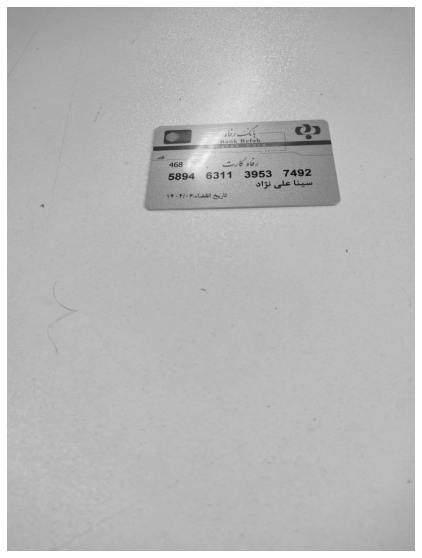

In [198]:
imshow(gray)

In [209]:
def sample_hsv_values(image, num_samples=10):
    # Convert the image to the HSV color space
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

    # Sample the hue, saturation, and value values from num_samples random locations in the image
    rows, cols, _ = image.shape
    row_indices = np.random.randint(0, rows, size=num_samples)
    col_indices = np.random.randint(0, cols, size=num_samples)
    hsv_values = hsv[row_indices, col_indices]

    # Separate the hue, saturation, and value values
    hue_values = hsv_values[:, 0]
    sat_values = hsv_values[:, 1]
    val_values = hsv_values[:, 2]

    return hue_values, sat_values, val_values

In [210]:
# Sample hue values from the image
hue_values, sat_values, val_values = sample_hsv_values(image)

# Calculate the minimum and maximum hue values
hue_min = np.min(hue_values)
hue_max = np.max(hue_values)
sat_min = np.min(sat_values)
sat_max = np.max(sat_values)
val_min = np.min(val_values)
val_max = np.max(val_values)

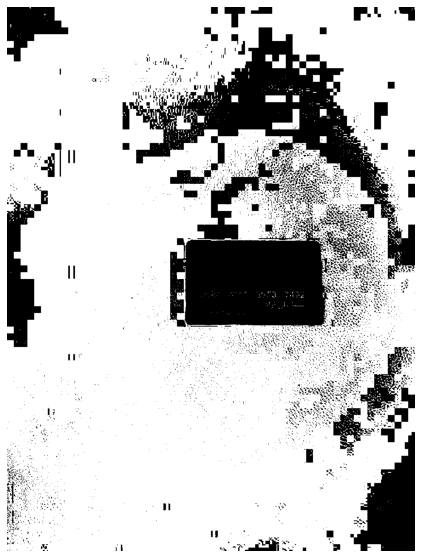

In [214]:
# im_gaussian = cv2.GaussianBlur(gray, (15,15), 40)
# # ret, edges = cv2.threshold(im_gaussian, 128, 255, cv2.THRESH_BINARY)
# edges = cv2.adaptiveThreshold(im_gaussian, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 15, 2)
# # edges = cv2.Canny(np.uint8(thresh), 1, 30) # I changed this many times
# imshow(edges)
img_hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
lower_range = np.array([hue_min, sat_min, val_min])
upper_range = np.array([hue_max, sat_max, val_max])
mask = cv2.inRange(img_hsv, lower_range, upper_range)
imshow(mask)

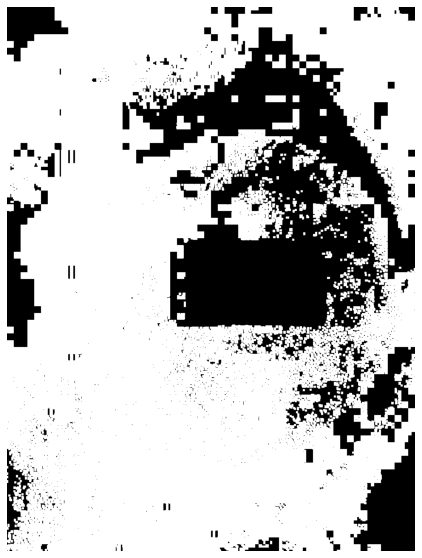

In [215]:
kernel = np.ones((5, 5), np.uint8)
mask = cv2.erode(mask, kernel, iterations=1)
mask = cv2.dilate(mask, kernel, iterations=1)
imshow(mask)

In [190]:
contours, hierarchy = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

In [191]:
max_area = 0
max_contour = None
for contour in contours:
    area = cv2.contourArea(contour)
    if area > max_area:
        max_area = area
        max_contour = contour

In [ ]:
x, y, w, h = cv2.boundingRect(max_contour)
cv2.drawContours(image, [max_contour], -1, (0, 255, 0), 2)
cv2.rectangle(image, (x, y), (x + w, y + h), (0, 0, 255), 2)

In [175]:
# contours, hierarchy = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

In [176]:
# largest_contour = max(contours, key=cv2.contourArea)


In [177]:
# x, y, w, h = cv2.boundingRect(largest_contour)
# rect = cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)

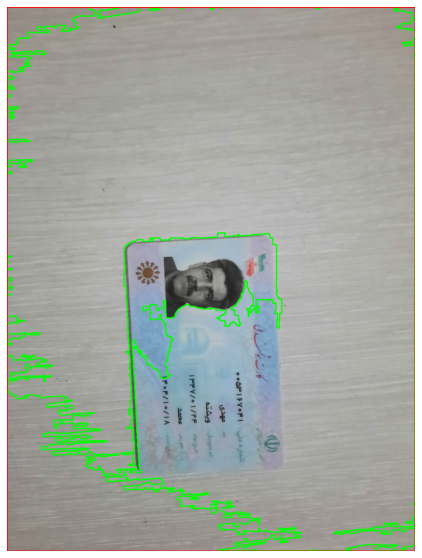

In [193]:
imshow(image)